# PreProcessing #

In [2]:
# import necessary packages

import cv2
import os
import dlib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

#### Preprocessing for ASD and non-ASD dataset ####

In [3]:
# For ASD dataset input path
input_directory = '/Users/isurudissanayake/Library/CloudStorage/GoogleDrive-isuru.20211132@iit.ac.lk/My Drive/FYP/Datasets/DATA_SET/ASD'

# For ASD dataset output path
output_directory = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD'

# For NON-ASD dataset input path
# input_directory = '/Users/isurudissanayake/Library/CloudStorage/GoogleDrive-isuru.20211132@iit.ac.lk/My Drive/FYP/Datasets/DATA_SET/NON_ASD'

# For NON-ASD dataset output path
# output_directory = '/Users/isurudissanayake/Documents/Data/DATA_SET/NON_ASD'

# For NON-ASD dataset output path
os.makedirs(output_directory, exist_ok=True)

#### resize the image according to the below width and height ####

In [9]:
width = 224
height = 224
target_size = (width, height)

laplacian_variances = []

#### using haar cascade classifier to detect faces and add the margin to the detected face ####

In [10]:
face_cascade = cv2.CascadeClassifier('/Users/isurudissanayake/Library/Mobile Documents/com~apple~CloudDocs/IIT/4th_Year/4_2/FYP/Implementation/FYP_Implementation/FYP_Impl/haarcascade_frontalface_default.xml')
detector = dlib.get_frontal_face_detector()
margin = 3

#### function to resize the input image ####

In [11]:
def resize_image(img):
    resized_img = cv2.resize(img, target_size)
    return resized_img

#### Check the clarity of an image by computing the Laplacian variance. ####

In [12]:
def is_image_clear(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    print("laplacian_var: ", laplacian_var)
    return laplacian_var

#### Check if the input image contains a clear face, and return the image if conditions are met. ####

In [13]:
def clear_image(img):
    gray = cv2.cvtColor(resize_image(img), cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.01, minNeighbors=3)
    
    if len(faces) > 0 and is_image_clear(img):
        return img

#### Crop and extract the first detected face region with an additional margin from the input image. ####

In [14]:
def crop_faces(img):
    cleared_img = clear_image(img)

    if cleared_img is not None:
        gray = cv2.cvtColor(cleared_img, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        if len(faces) > 0:
            face = faces[0]

            # Extract the face region with an additional margin
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            x = max(0, x - margin)
            y = max(0, y - margin)
            w = min(img.shape[1] - x, w + 2 * margin)
            h = min(img.shape[0] - y, h + 2 * margin)

            # Extract the face region with margin
            face_region = img[y:y+h, x:x+w]

            # Check if the face region is not empty before saving
            if not face_region.size == 0:
                return face_region
            else:
                print(f"Empty face region")
        else:
            print(f"No face detected")
    else:
        print(f"Clear image is None")

    return None

#### Plots a histogram of Laplacian variances for clear images. ####

In [15]:
def plot_histogram():
    plt.hist(laplacian_variances, bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Histogram of Laplacian Variances for Clear Images')
    plt.xlabel('Laplacian Variance')
    plt.ylabel('Frequency')
    plt.show()

#### Preprocess images in the input directory by cropping faces and save the results in the output directory. ####

In [16]:
def preprocessing(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Read the image
            image_path = os.path.join(input_dir, filename)
            img = cv2.imread(image_path)

            # Calculate Laplacian variance for clear images
            cleared_img = clear_image(img)
            if cleared_img is not None:
                laplacian_variances.append(is_image_clear(cleared_img))

            # Crop faces and save to the output directory
            cropped_face = crop_faces(img)
            if cropped_face is not None:
                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, cropped_face)

    # Plot histogram of Laplacian variances
    plot_histogram()

#### Perform preprocessing on images from the input directory and save the results in the output directory. ####

laplacian_var:  394.06622937390534
laplacian_var:  394.06622937390534
laplacian_var:  394.06622937390534
laplacian_var:  227.78011201982548
laplacian_var:  227.78011201982548
laplacian_var:  227.78011201982548
laplacian_var:  23.082727568788282
laplacian_var:  23.082727568788282
laplacian_var:  23.082727568788282
laplacian_var:  317.80483512772025
laplacian_var:  317.80483512772025
laplacian_var:  317.80483512772025
laplacian_var:  343.18160135391776
laplacian_var:  343.18160135391776
laplacian_var:  343.18160135391776
laplacian_var:  137.51885638908857
laplacian_var:  137.51885638908857
laplacian_var:  137.51885638908857
laplacian_var:  164.03806289294462
laplacian_var:  164.03806289294462
laplacian_var:  164.03806289294462
laplacian_var:  1590.114833882328
laplacian_var:  1590.114833882328
laplacian_var:  1590.114833882328
laplacian_var:  786.4614921085212
laplacian_var:  786.4614921085212
laplacian_var:  786.4614921085212
No face detected
Clear image is None
laplacian_var:  206.0796

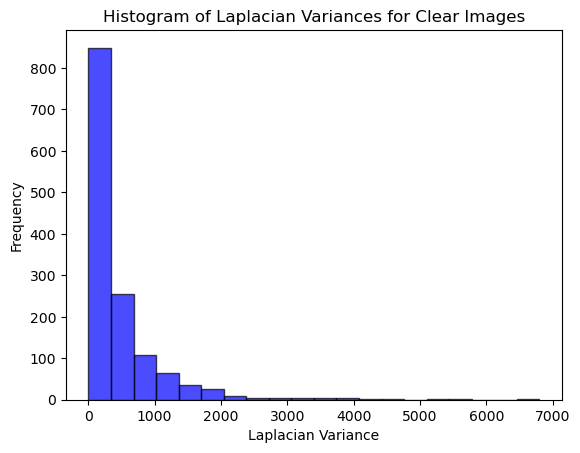

In [17]:
preprocessing(input_directory, output_directory)